In [44]:
%load_ext autoreload
%autoreload 2
from utils import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
re.sub('(?<!\w)[\d]+(?!\w)', '', "jlm2017")

'jlm2017'

## Decathlon

In [35]:
data = pd.read_csv('csv/decathlon_reviews.csv')

In [36]:
np.count_nonzero(data.label == 1) / len(data)

0.8713345969450329

In [37]:
np.count_nonzero(data.label == -1) / len(data)

0.1286654030549671

In [38]:
len(data)

53814

In [39]:
fr_stopwords = nltk.corpus.stopwords.words('french')
fr_stopwords.extend(['de', 'ou', 'sur', 'or', 'ni', 'car', 'quand', 'a', 'mais', 'donc', 'si', 'quel', 'entre',\
                       'tout', 'ce', 'cet', 'ça', 'tous', "c'est", 'faire', 'dans', 'fait'])

In [57]:
review_list=np.array(data.review)

In [58]:
[vectorizer, words_freq] = build_vectorizer(review_list, stopwords=fr_stopwords, b_stemming=True,\
                                          b_rmaccent=True,max_features=1000)

Removing stopwords
Stemming
Removing accents
Keeping the top 1000 occurring tokens


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [9]:
features = vectorizer.get_feature_names()
print(len(features))

1000


In [10]:
words_freq

[('bon', 14694),
 ('tres', 14559),
 ('produit', 11960),
 ('bien', 9271),
 ('plus', 7214),
 ('prix', 6434),
 ('utilis', 5890),
 ('qualit', 5643),
 ('achet', 4792),
 ('peu', 3987),
 ('pratiqu', 3891),
 ('rapport', 3552),
 ('tre', 3398),
 ('trop', 3207),
 ('facil', 3130),
 ('mêm', 3127),
 ('confort', 3126),
 ('port', 3010),
 ('recommand', 2536),
 ('taill', 2478),
 ('vrai', 2394),
 ('sup', 2383),
 ('san', 2331),
 ('autr', 2247),
 ('trouv', 2226),
 ('agréabl', 2145),
 ('an', 2131),
 ('couleur', 2128),
 ('chaussur', 2085),
 ('apres', 2047),
 ('comm', 2038),
 ('pied', 2027),
 ('seul', 2010),
 ('peut', 2000),
 ('grand', 1988),
 ('fois', 1901),
 ('chaud', 1872),
 ('coup', 1820),
 ('rien', 1809),
 ('avoir', 1760),
 ('cel', 1728),
 ('sac', 1722),
 ('pet', 1720),
 ('temp', 1707),
 ('mettr', 1695),
 ('achat', 1692),
 ('auss', 1641),
 ('enfant', 1635),
 ('petit', 1630),
 ('être', 1626),
 ('dommag', 1557),
 ('été', 1555),
 ('conseil', 1552),
 ('fil', 1536),
 ('cher', 1530),
 ('assez', 1529),
 ('tré',

In [11]:
X = vectorize_docs(vectorizer, commentaire_list)

In [12]:
vectorizer.get_feature_names()

['10',
 '100',
 '1er',
 '20',
 '2012',
 '2em',
 '30',
 'abim',
 'abord',
 'absolu',
 'absorb',
 'accessoir',
 'accompagn',
 'accroch',
 'achat',
 'achet',
 'activ',
 'adapt',
 'adhérent',
 'adopt',
 'ador',
 'adult',
 'aer',
 'affair',
 'afin',
 'agreabl',
 'agréabl',
 'aid',
 'ailleur',
 'aim',
 'ains',
 'air',
 'ais',
 'ajout',
 'ajust',
 'aller',
 'alor',
 'amateur',
 'ami',
 'amort',
 'amortisseur',
 'ampoul',
 'amus',
 'amélior',
 'an',
 'ancien',
 'anneau',
 'anné',
 'anti',
 'appareil',
 'apport',
 'apprec',
 'appréci',
 'apre',
 'apres',
 'apré',
 'arc',
 'arrier',
 'arriv',
 'arrêt',
 'articl',
 'assez',
 'assur',
 'attach',
 'attend',
 'attent',
 'attract',
 'aucun',
 'auss',
 'aut',
 'autour',
 'autr',
 'avant',
 'avantag',
 'avis',
 'avoir',
 'aérat',
 'bain',
 'balad',
 'ball',
 'ballad',
 'ballon',
 'band',
 'barr',
 'bas',
 'basket',
 'bass',
 'bateau',
 'beau',
 'beaucoup',
 'beb',
 'bel',
 'besoin',
 'bidon',
 'bien',
 'blanc',
 'blanch',
 'bless',
 'bleu',
 'bloqu',
 

In [13]:
target = np.array(data.label)

In [14]:
X.shape

(53814, 1000)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [35]:
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]

In [37]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    #### MODIFIER LA FONCTION DE SCORE
    scores = cross_val_score(clf, X_train, y_train, cv=3,scoring='f1')
    mean_scores.append(np.mean(scores)) 

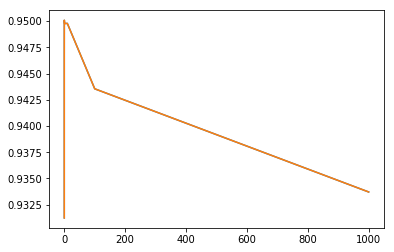

In [40]:
plt.plot(interval, mean_scores)
plt.show()

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [45]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.5758589236850107

## Movies

In [55]:
data_movies = pd.read_csv('csv/movie_reviews.csv')
review_list=np.array(data_movies.review)


In [58]:
print(np.count_nonzero(data_movies.label == -1) / len(data_movies))
print(np.count_nonzero(data_movies.label == 1) / len(data_movies))

0.8365562575786585
0.1634437424213415


In [59]:
X_movies = vectorize_docs(vectorizer, review_list)
y_movies = np.array(data_movies.label)


In [62]:
#
y_pred=clf.predict(X_movies)
f1_score(y_movies,y_pred,pos_label=1)

0.3367252543940795